In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler

In [4]:
df = pd.read_csv("Bondora_preprocessed.csv")

In [5]:
df

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,...,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,0,115.0410,True,Income Unverified Crossref By Phone,Estonian,61,Female,EE,319.5582,...,M1,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0
1,0,0,140.6057,False,Income Unverified Crossref By Phone,Estonian,48,Female,EE,191.7349,...,M1,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0
2,0,0,319.5580,True,Income Unverified Crossref By Phone,Estonian,58,Female,EE,319.5582,...,M1,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1
3,0,0,57.5205,True,Income Unverified Crossref By Phone,Estonian,23,Female,EE,127.8233,...,M1,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0
4,0,0,319.5582,True,Income Unverified Crossref By Phone,Estonian,25,Female,EE,319.5582,...,M1,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,Income Verified,Finnish,37,Male,FI,3000.0000,...,M1,2308.1900,0.0000,0.00,0.00,0,0.0000,0.0000,0,1
77390,1880,0,1120.0000,False,Income Verified,Finnish,35,Male,FI,3000.0000,...,M1,3000.0000,1990.0300,0.00,0.00,1,3000.0000,389.3600,0,0
77391,1975,0,525.0000,True,Income Unverified,Finnish,40,Male,FI,2500.0000,...,M1,1869.7600,199.3300,630.24,1227.98,0,0.0000,0.0000,0,1
77392,1840,0,1160.0000,False,Income and Expenses Verified,Estonian,47,Female,EE,3000.0000,...,M1,2257.5400,561.5300,0.00,0.00,1,500.0000,96.8000,0,1


In [6]:
df.UseOfLoan.value_counts()

Not Set                            44177
Other                               8926
Home Improvement                    8102
Loan Consolidation                  6419
Vehicle                             2884
Business                            1743
Travel                              1621
Health                              1367
Education                           1259
Real Estate                          843
Purchase of Machinery Equipment       21
Other Business                        17
Accounts Receivable Financing          6
Working Capital Financing              5
Acquisition of Stocks                  2
Acquisition of Real Estate             1
Construction Finance                   1
Name: UseOfLoan, dtype: int64

In [14]:
X = loan.drop(columns="Target")
Y = loan.Target

In [15]:
cols = ["VerificationType","Gender","LanguageCode","UseOfLoan","Education","MaritalStatus","EmploymentStatus",
        "NewCreditCustomer","Restructured","OccupationArea","HomeOwnershipType","CreditScoreEsMicroL",
        "EmploymentDurationCurrentEmployer","Country"]

In [16]:
for i in cols:
    
    X[i] = LabelEncoder().fit_transform(X[i])

In [17]:
X[cols]

,VerificationType,Gender,LanguageCode,UseOfLoan,Education,MaritalStatus,EmploymentStatus,NewCreditCustomer,Restructured,OccupationArea,HomeOwnershipType,CreditScoreEsMicroL,EmploymentDurationCurrentEmployer,Country
0,1,0,1,10,5,2,1,1,0,17,6,1,6,0
1,1,0,1,10,1,1,1,0,0,5,6,1,0,0
2,1,0,1,7,4,2,1,1,1,9,6,1,7,0
3,1,0,1,8,0,4,2,1,0,13,6,1,5,0
4,1,0,1,15,4,0,1,1,0,17,6,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2,1,2,8,5,4,1,1,0,13,0,1,0,2
77390,2,1,2,7,5,4,1,0,0,18,8,1,0,2
77391,0,1,2,8,5,2,0,1,0,4,8,1,0,2
77392,3,0,1,10,1,2,1,0,1,8,11,1,0,0


<AxesSubplot:>

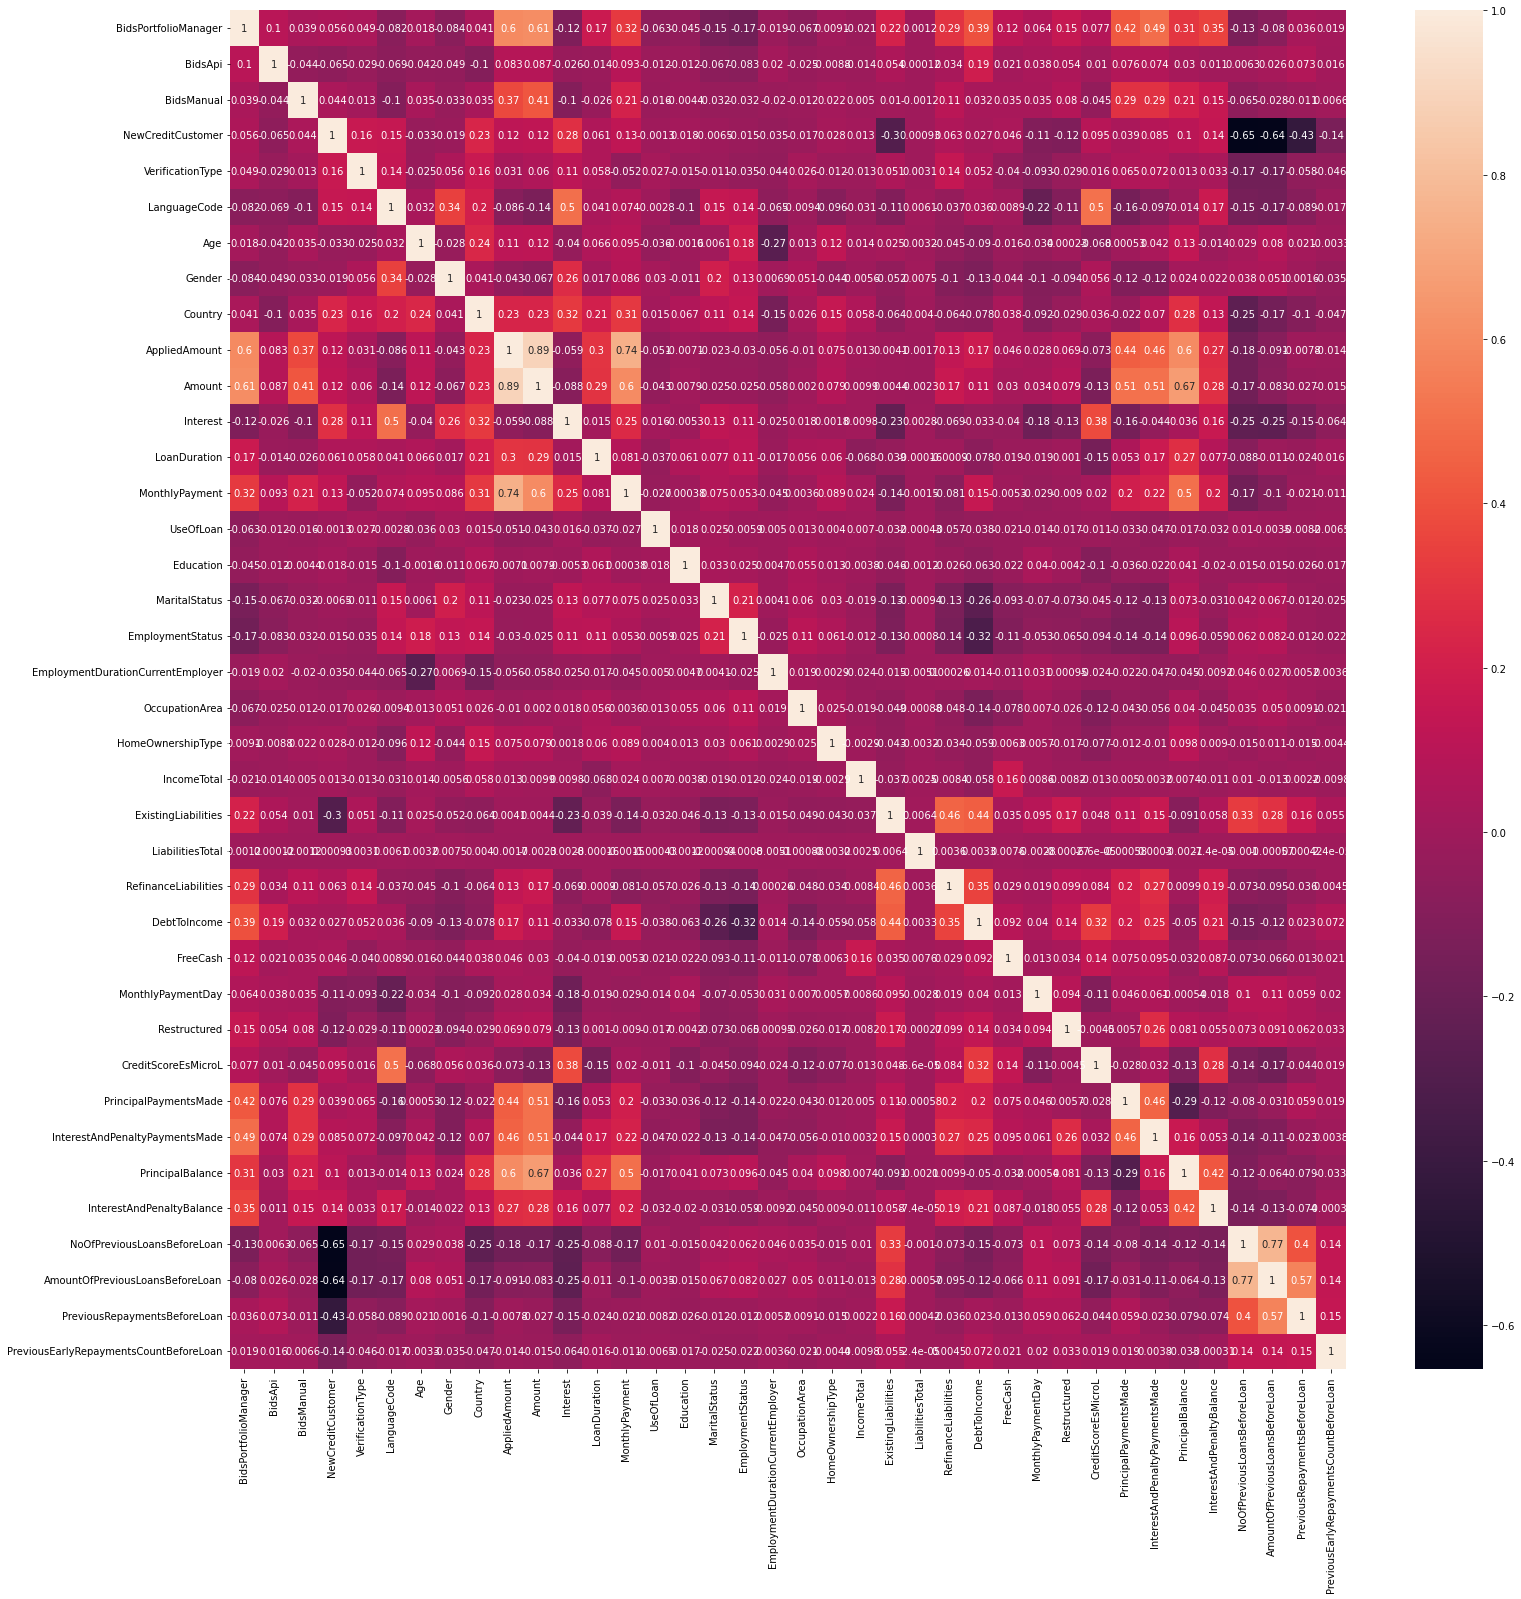

In [18]:
plt.subplots(figsize=[25,25])
sns.heatmap(X.corr(), annot=True)

In [19]:
X.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'VerificationType', 'LanguageCode', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Restructured', 'CreditScoreEsMicroL',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

In [20]:
remove = ["BidsPortfolioManager","NewCreditCustomer","ExistingLiabilities","RefinanceLiabilities",
         "PrincipalPaymentsMade","NoOfPreviousLoansBeforeLoan","CreditScoreEsMicroL"]

In [21]:
X = X.drop(columns=remove)

<AxesSubplot:>

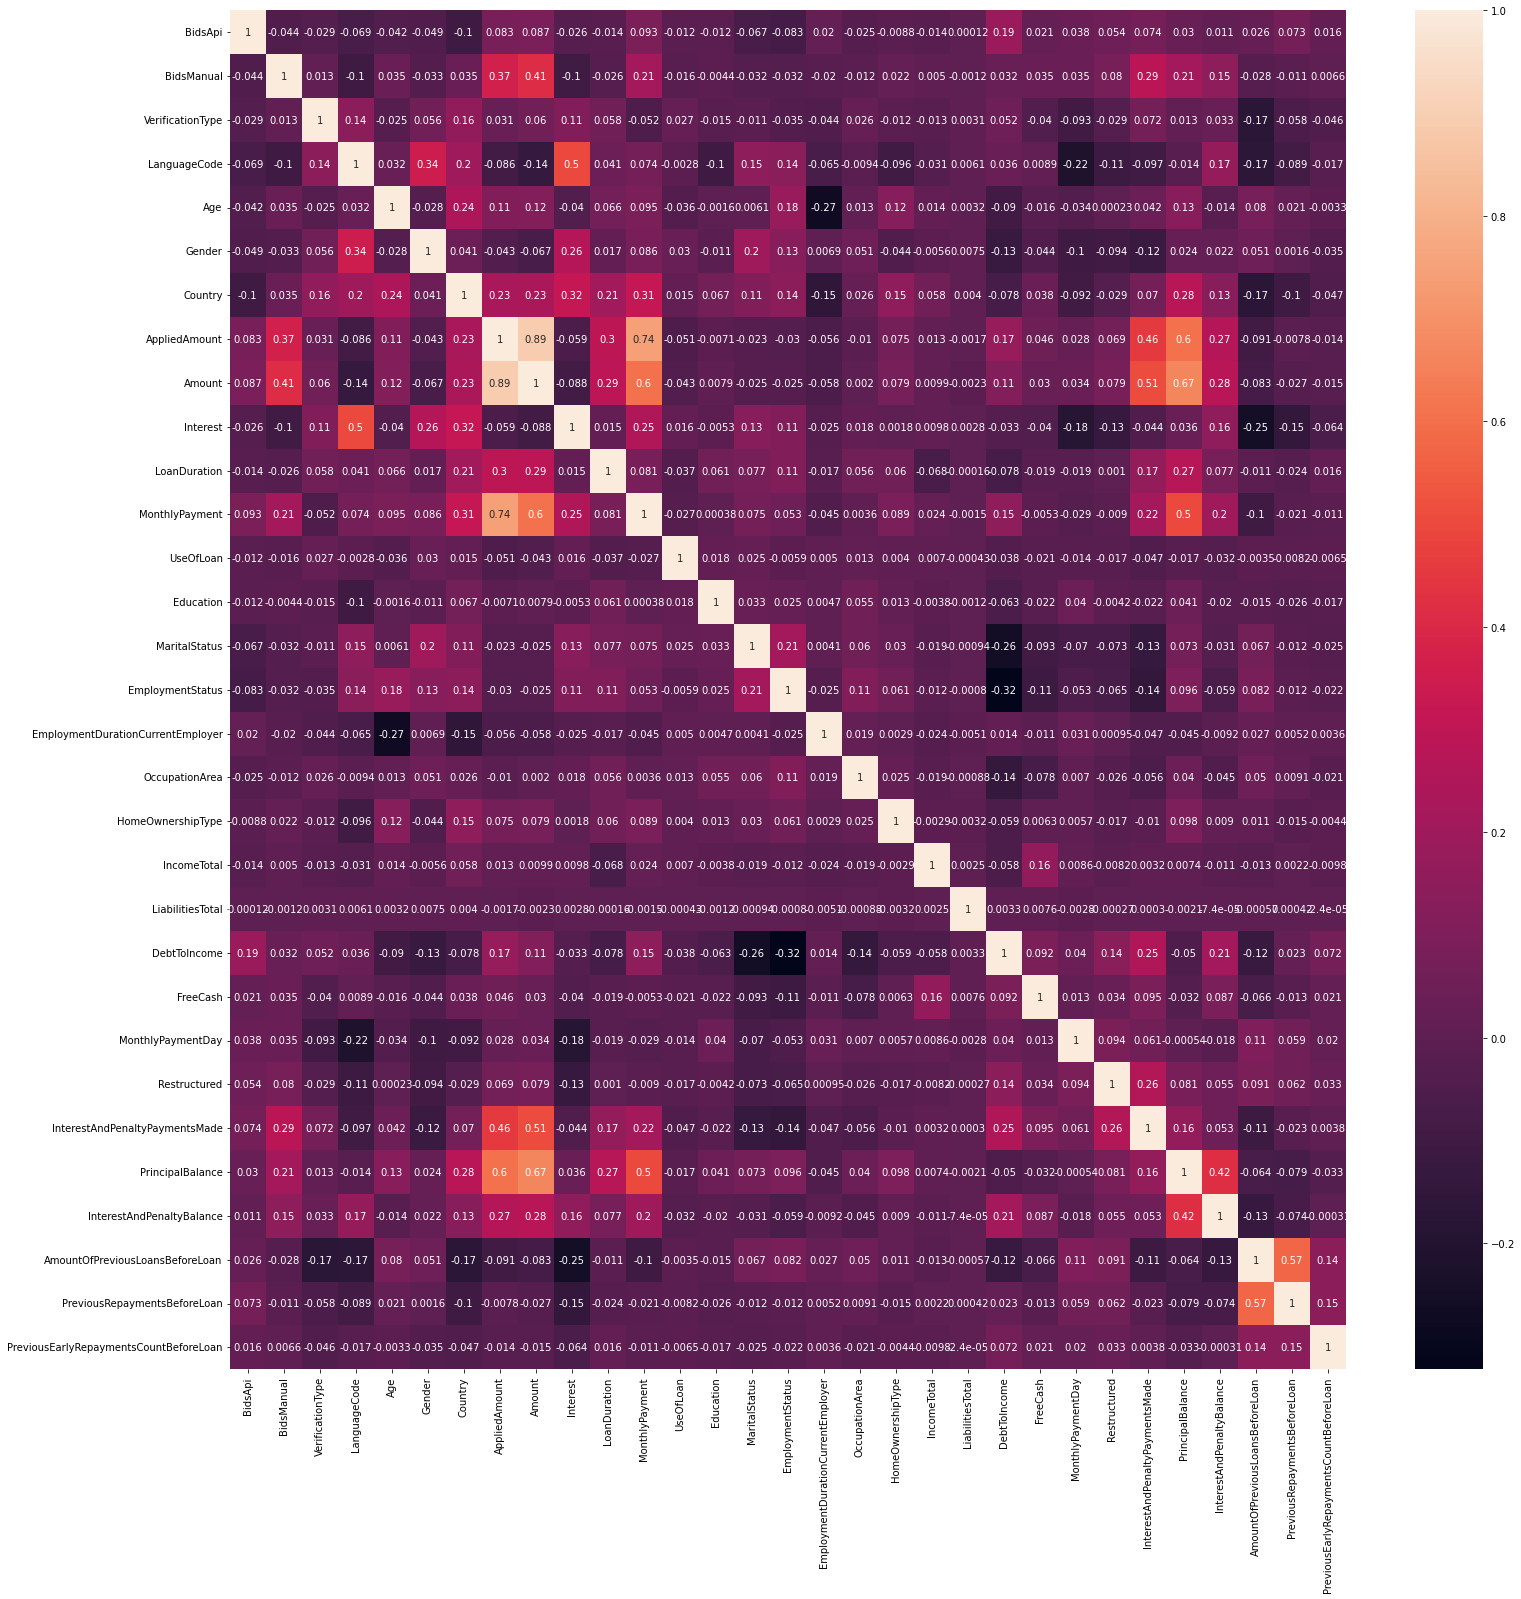

In [22]:
plt.subplots(figsize=[25,25])
sns.heatmap(X.corr(), annot=True)

In [23]:
X = X.drop(columns=["MonthlyPayment","AmountOfPreviousLoansBeforeLoan","InterestAndPenaltyPaymentsMade",
                   "BidsManual","LanguageCode"])

In [24]:
X.shape

(77394, 26)

In [25]:
X.columns

Index(['BidsApi', 'VerificationType', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome',
       'FreeCash', 'MonthlyPaymentDay', 'Restructured', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan'],
      dtype='object')

<AxesSubplot:>

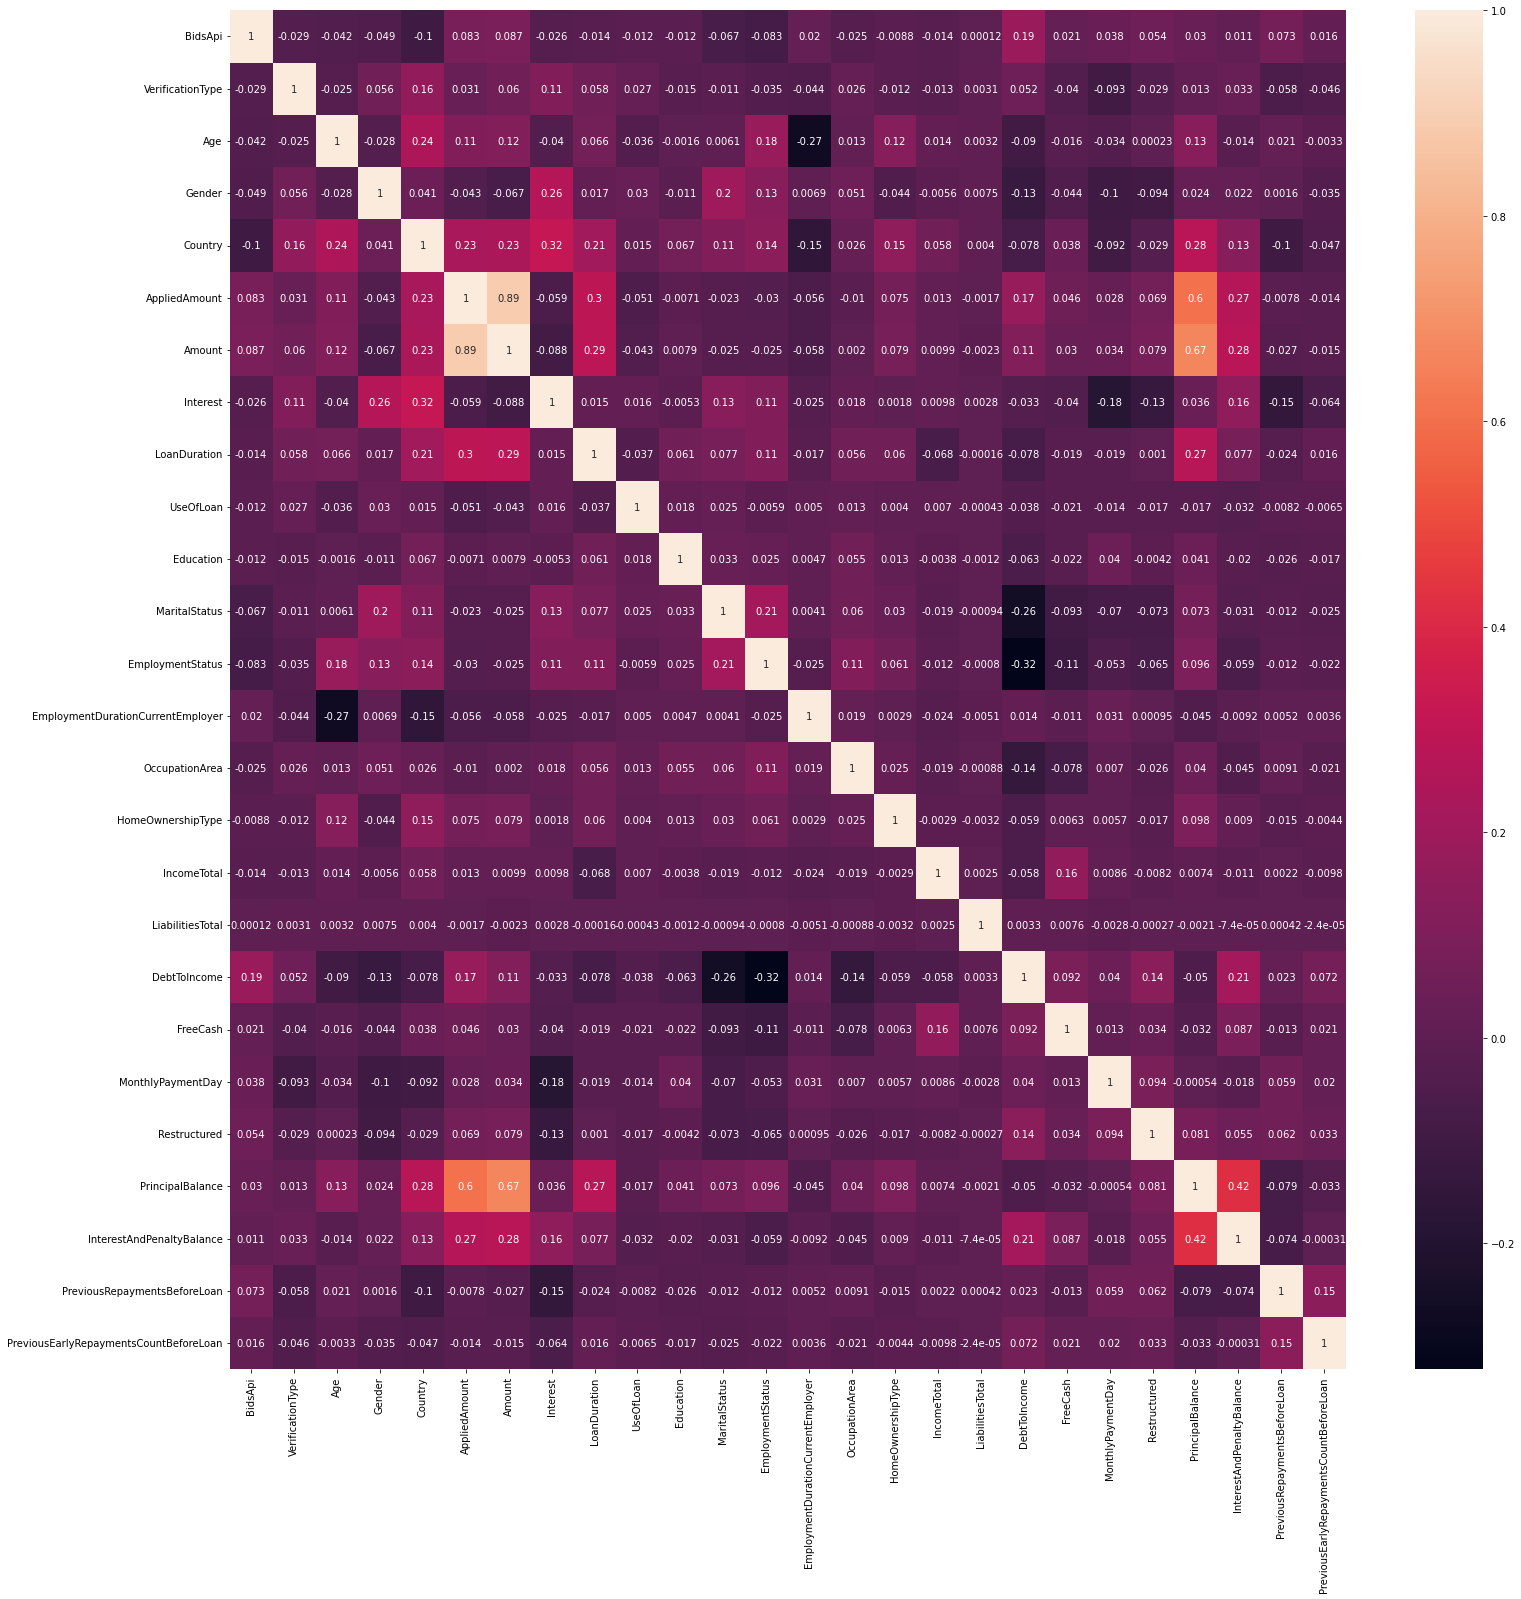

In [26]:
plt.subplots(figsize=[25,25])
sns.heatmap(X.corr(), annot=True)

In [27]:
X

,BidsApi,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,IncomeTotal,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalBalance,InterestAndPenaltyBalance,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,1,61,0,0,319.5582,115.0408,30.00,12,10,...,10500.0,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0
1,0,1,48,0,0,191.7349,140.6057,25.00,1,10,...,10800.0,0.00,0.00,0.00,15,0,0.00,0.00,258.6256,0
2,0,1,58,0,0,319.5582,319.5409,25.00,20,7,...,7000.0,0.00,0.00,0.00,25,1,116.35,414.07,0.0000,0
3,0,1,23,0,0,127.8233,57.5205,45.00,15,8,...,11600.0,0.00,0.00,0.00,15,0,0.00,0.00,0.0000,0
4,0,1,25,0,0,319.5582,319.5436,30.00,12,15,...,6800.0,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0,2,37,1,2,3000.0000,3000.0000,31.01,60,8,...,1400.0,500.00,7.69,792.32,1,0,0.00,0.00,0.0000,0
77390,0,2,35,1,2,3000.0000,3000.0000,18.25,60,7,...,2265.0,1777.46,31.58,520.67,7,0,0.00,0.00,389.3600,0
77391,0,0,40,1,2,2500.0000,2500.0000,24.83,60,8,...,2500.0,1350.00,3.22,1069.58,1,0,630.24,1227.98,0.0000,0
77392,0,3,47,0,0,3000.0000,3000.0000,17.74,60,10,...,540.0,732.05,44.35,50.49,1,1,0.00,0.00,96.8000,0


In [28]:
X.VerificationType.value_counts()

3    41428
0    25626
2     8460
1     1827
4       53
Name: VerificationType, dtype: int64

In [29]:
X.Gender.value_counts()

1    50697
0    20927
2     5770
Name: Gender, dtype: int64

In [30]:
X.Country.value_counts()

0    39896
2    20677
1    16527
3      294
Name: Country, dtype: int64

In [31]:
X = X[X.Country != 3]


In [32]:
X.EmploymentStatus.value_counts()

2    44405
1    27071
0     1687
4     1642
5     1194
3     1101
Name: EmploymentStatus, dtype: int64

In [33]:
X.EmploymentDurationCurrentEmployer.value_counts()

0    29227
4    14223
8    13761
5     5487
6     4508
2     3344
7     3039
1     2893
3      618
Name: EmploymentDurationCurrentEmployer, dtype: int64

In [34]:
X.OccupationArea.value_counts()

12    44324
13     7536
17     3180
4      2992
14     2874
18     2263
8      2171
9      2102
10     1776
3      1546
5      1241
7      1038
1       890
0       784
6       525
2       524
16      492
15      433
19      293
11      116
Name: OccupationArea, dtype: int64

In [35]:
X.HomeOwnershipType.value_counts()#removing Homeless

8     24496
10    16809
4     12655
5      8758
11     4010
7      3179
2      2690
6      1654
3      1357
0       882
9       564
1        46
Name: HomeOwnershipType, dtype: int64

In [36]:
X = X[X.HomeOwnershipType != 1]


In [37]:
X.Restructured.value_counts()

0    61651
1    15403
Name: Restructured, dtype: int64

In [38]:
X.shape

(77054, 26)

In [39]:
X

,BidsApi,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,IncomeTotal,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalBalance,InterestAndPenaltyBalance,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,1,61,0,0,319.5582,115.0408,30.00,12,10,...,10500.0,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0
1,0,1,48,0,0,191.7349,140.6057,25.00,1,10,...,10800.0,0.00,0.00,0.00,15,0,0.00,0.00,258.6256,0
2,0,1,58,0,0,319.5582,319.5409,25.00,20,7,...,7000.0,0.00,0.00,0.00,25,1,116.35,414.07,0.0000,0
3,0,1,23,0,0,127.8233,57.5205,45.00,15,8,...,11600.0,0.00,0.00,0.00,15,0,0.00,0.00,0.0000,0
4,0,1,25,0,0,319.5582,319.5436,30.00,12,15,...,6800.0,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,0,2,37,1,2,3000.0000,3000.0000,31.01,60,8,...,1400.0,500.00,7.69,792.32,1,0,0.00,0.00,0.0000,0
77390,0,2,35,1,2,3000.0000,3000.0000,18.25,60,7,...,2265.0,1777.46,31.58,520.67,7,0,0.00,0.00,389.3600,0
77391,0,0,40,1,2,2500.0000,2500.0000,24.83,60,8,...,2500.0,1350.00,3.22,1069.58,1,0,630.24,1227.98,0.0000,0
77392,0,3,47,0,0,3000.0000,3000.0000,17.74,60,10,...,540.0,732.05,44.35,50.49,1,1,0.00,0.00,96.8000,0


In [40]:
data = X.join(Y)

In [41]:
data.reset_index(drop=["level_0","index"], inplace=True)

In [42]:
data

,BidsApi,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalBalance,InterestAndPenaltyBalance,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,1,61,0,0,319.5582,115.0408,30.00,12,10,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,0
1,0,1,48,0,0,191.7349,140.6057,25.00,1,10,...,0.00,0.00,0.00,15,0,0.00,0.00,258.6256,0,0
2,0,1,58,0,0,319.5582,319.5409,25.00,20,7,...,0.00,0.00,0.00,25,1,116.35,414.07,0.0000,0,1
3,0,1,23,0,0,127.8233,57.5205,45.00,15,8,...,0.00,0.00,0.00,15,0,0.00,0.00,0.0000,0,0
4,0,1,25,0,0,319.5582,319.5436,30.00,12,15,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77049,0,2,37,1,2,3000.0000,3000.0000,31.01,60,8,...,500.00,7.69,792.32,1,0,0.00,0.00,0.0000,0,1
77050,0,2,35,1,2,3000.0000,3000.0000,18.25,60,7,...,1777.46,31.58,520.67,7,0,0.00,0.00,389.3600,0,0
77051,0,0,40,1,2,2500.0000,2500.0000,24.83,60,8,...,1350.00,3.22,1069.58,1,0,630.24,1227.98,0.0000,0,1
77052,0,3,47,0,0,3000.0000,3000.0000,17.74,60,10,...,732.05,44.35,50.49,1,1,0.00,0.00,96.8000,0,1


In [43]:
data=data[data['Age']>18]
data=data[data['DebtToIncome']<100]

In [44]:
data

,BidsApi,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalBalance,InterestAndPenaltyBalance,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,1,61,0,0,319.5582,115.0408,30.00,12,10,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,0
1,0,1,48,0,0,191.7349,140.6057,25.00,1,10,...,0.00,0.00,0.00,15,0,0.00,0.00,258.6256,0,0
2,0,1,58,0,0,319.5582,319.5409,25.00,20,7,...,0.00,0.00,0.00,25,1,116.35,414.07,0.0000,0,1
3,0,1,23,0,0,127.8233,57.5205,45.00,15,8,...,0.00,0.00,0.00,15,0,0.00,0.00,0.0000,0,0
4,0,1,25,0,0,319.5582,319.5436,30.00,12,15,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77049,0,2,37,1,2,3000.0000,3000.0000,31.01,60,8,...,500.00,7.69,792.32,1,0,0.00,0.00,0.0000,0,1
77050,0,2,35,1,2,3000.0000,3000.0000,18.25,60,7,...,1777.46,31.58,520.67,7,0,0.00,0.00,389.3600,0,0
77051,0,0,40,1,2,2500.0000,2500.0000,24.83,60,8,...,1350.00,3.22,1069.58,1,0,630.24,1227.98,0.0000,0,1
77052,0,3,47,0,0,3000.0000,3000.0000,17.74,60,10,...,732.05,44.35,50.49,1,1,0.00,0.00,96.8000,0,1


In [47]:
data.columns

Index(['BidsApi', 'VerificationType', 'Age', 'Gender', 'Country',
       'AppliedAmount', 'Amount', 'Interest', 'LoanDuration', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome',
       'FreeCash', 'MonthlyPaymentDay', 'Restructured', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Target'],
      dtype='object')

In [45]:
data.reset_index(drop=["level_0","index"], inplace=True)

In [46]:
data

,BidsApi,VerificationType,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,LiabilitiesTotal,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalBalance,InterestAndPenaltyBalance,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Target
0,0,1,61,0,0,319.5582,115.0408,30.00,12,10,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,0
1,0,1,48,0,0,191.7349,140.6057,25.00,1,10,...,0.00,0.00,0.00,15,0,0.00,0.00,258.6256,0,0
2,0,1,58,0,0,319.5582,319.5409,25.00,20,7,...,0.00,0.00,0.00,25,1,116.35,414.07,0.0000,0,1
3,0,1,23,0,0,127.8233,57.5205,45.00,15,8,...,0.00,0.00,0.00,15,0,0.00,0.00,0.0000,0,0
4,0,1,25,0,0,319.5582,319.5436,30.00,12,15,...,0.00,0.00,0.00,25,0,0.00,0.00,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76824,0,2,37,1,2,3000.0000,3000.0000,31.01,60,8,...,500.00,7.69,792.32,1,0,0.00,0.00,0.0000,0,1
76825,0,2,35,1,2,3000.0000,3000.0000,18.25,60,7,...,1777.46,31.58,520.67,7,0,0.00,0.00,389.3600,0,0
76826,0,0,40,1,2,2500.0000,2500.0000,24.83,60,8,...,1350.00,3.22,1069.58,1,0,630.24,1227.98,0.0000,0,1
76827,0,3,47,0,0,3000.0000,3000.0000,17.74,60,10,...,732.05,44.35,50.49,1,1,0.00,0.00,96.8000,0,1


<AxesSubplot:>

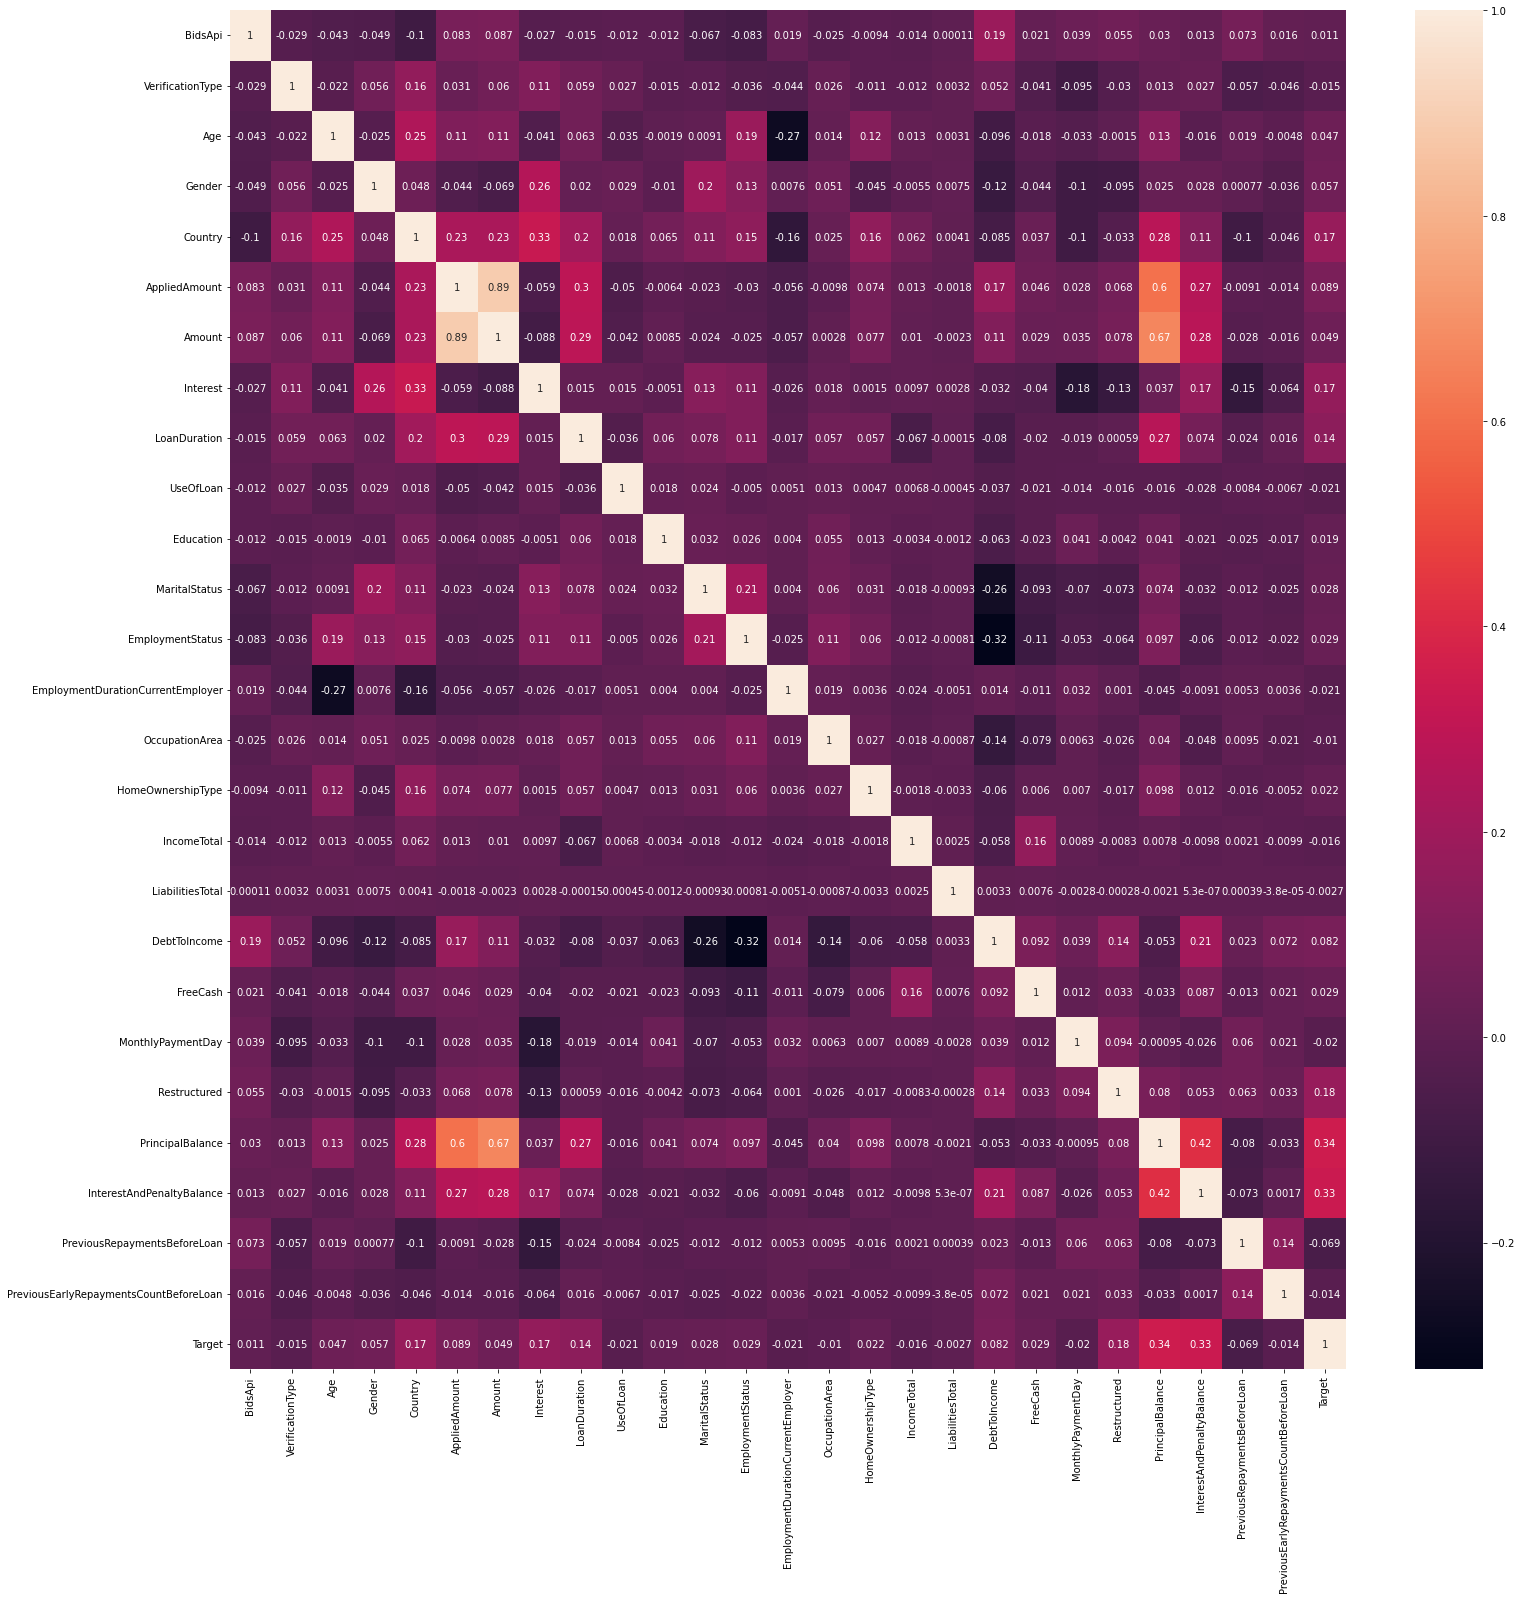

In [48]:
plt.subplots(figsize=[25,25])
sns.heatmap(data.corr(), annot=True)

In [36]:
scaler = RobustScaler()
robust_df = scaler.fit_transform(data)
robust_df = pd.DataFrame(robust_df)
  

In [37]:
robust_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,-0.666667,1.277778,-1.0,0.0,-0.779124,-0.073584,-1.500000,1.0,0.333333,...,8.363636,-0.615856,0.000000,0.000000,1.363636,0.0,-0.07843,0.000000,0.0,-1.0
1,0.0,-0.666667,0.555556,-1.0,0.0,-0.768668,-0.257542,-1.958333,1.0,-1.000000,...,8.636364,-0.615856,0.000000,0.000000,0.454545,0.0,-0.07843,0.694941,0.0,-1.0
2,0.0,-0.666667,1.111111,-1.0,0.0,-0.695484,-0.257542,-1.166667,-2.0,0.000000,...,5.181818,-0.615856,0.000000,0.000000,1.363636,1.0,0.31064,0.000000,0.0,0.0
3,0.0,-0.666667,-0.833333,-1.0,0.0,-0.802650,0.478293,-1.375000,-1.0,-1.333333,...,9.363636,-0.615856,0.000000,0.000000,0.454545,0.0,-0.07843,0.000000,0.0,-1.0
4,0.0,-0.666667,-0.722222,-1.0,0.0,-0.695483,-0.073584,-1.500000,6.0,0.000000,...,5.000000,-0.615856,0.000000,0.000000,1.363636,0.0,-0.07843,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77002,0.0,-0.333333,-0.055556,0.0,1.0,0.400818,-0.036424,0.500000,-1.0,0.333333,...,0.090909,0.184144,0.370781,2.967491,-0.818182,0.0,-0.07843,0.000000,0.0,0.0
77003,0.0,-0.333333,-0.166667,0.0,1.0,0.400818,-0.505887,0.500000,-2.0,0.333333,...,0.877273,2.228080,1.522662,1.950075,-0.272727,0.0,-0.07843,1.046231,0.0,-1.0
77004,0.0,-1.000000,0.111111,0.0,1.0,0.196319,-0.263797,0.500000,-1.0,0.333333,...,1.090909,1.544144,0.155256,4.005918,-0.818182,0.0,1.07541,0.000000,0.0,0.0
77005,0.0,0.000000,0.500000,-1.0,0.0,0.400818,-0.524650,0.500000,1.0,-1.000000,...,-0.690909,0.555424,2.138380,0.189101,-0.818182,1.0,-0.07843,0.260107,0.0,0.0


In [38]:
robust_df.to_csv('Bondora_after_feature_engineering.csv', index=False)

In [39]:
from sklearn.decomposition import PCA

In [41]:
df2 = pd.read_csv("Bondora_after_feature_engineering.csv")

## 

In [42]:
df2


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,-0.666667,1.277778,-1.0,0.0,-0.779124,-0.073584,-1.500000,1.0,0.333333,...,8.363636,-0.615856,0.000000,0.000000,1.363636,0.0,-0.07843,0.000000,0.0,-1.0
1,0.0,-0.666667,0.555556,-1.0,0.0,-0.768668,-0.257542,-1.958333,1.0,-1.000000,...,8.636364,-0.615856,0.000000,0.000000,0.454545,0.0,-0.07843,0.694941,0.0,-1.0
2,0.0,-0.666667,1.111111,-1.0,0.0,-0.695484,-0.257542,-1.166667,-2.0,0.000000,...,5.181818,-0.615856,0.000000,0.000000,1.363636,1.0,0.31064,0.000000,0.0,0.0
3,0.0,-0.666667,-0.833333,-1.0,0.0,-0.802650,0.478293,-1.375000,-1.0,-1.333333,...,9.363636,-0.615856,0.000000,0.000000,0.454545,0.0,-0.07843,0.000000,0.0,-1.0
4,0.0,-0.666667,-0.722222,-1.0,0.0,-0.695483,-0.073584,-1.500000,6.0,0.000000,...,5.000000,-0.615856,0.000000,0.000000,1.363636,0.0,-0.07843,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77002,0.0,-0.333333,-0.055556,0.0,1.0,0.400818,-0.036424,0.500000,-1.0,0.333333,...,0.090909,0.184144,0.370781,2.967491,-0.818182,0.0,-0.07843,0.000000,0.0,0.0
77003,0.0,-0.333333,-0.166667,0.0,1.0,0.400818,-0.505887,0.500000,-2.0,0.333333,...,0.877273,2.228080,1.522662,1.950075,-0.272727,0.0,-0.07843,1.046231,0.0,-1.0
77004,0.0,-1.000000,0.111111,0.0,1.0,0.196319,-0.263797,0.500000,-1.0,0.333333,...,1.090909,1.544144,0.155256,4.005918,-0.818182,0.0,1.07541,0.000000,0.0,0.0
77005,0.0,0.000000,0.500000,-1.0,0.0,0.400818,-0.524650,0.500000,1.0,-1.000000,...,-0.690909,0.555424,2.138380,0.189101,-0.818182,1.0,-0.07843,0.260107,0.0,0.0


In [54]:
X = df2.drop(columns="Target")


KeyError: "['Target'] not found in axis"

In [48]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(df2)

In [49]:
pca.explained_variance_ratio_.sum()

0.999181415649685

In [50]:
pca = PCA(n_components=8)
X_train = pca.fit_transform(df2)

In [51]:
pca.explained_variance_ratio_.sum()

0.9987403715705621

In [52]:
pca = PCA(n_components=15)
X_train = pca.fit_transform(df2)

In [53]:
pca.explained_variance_ratio_.sum()

0.9996409614563376